In [10]:
import pandas as pd
import matplotlib.pyplot as plt

/tmp/ipykernel_263342/941995707.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontweight='bold', fontsize=12)  # Make y-axis tick labels bold and increase font size


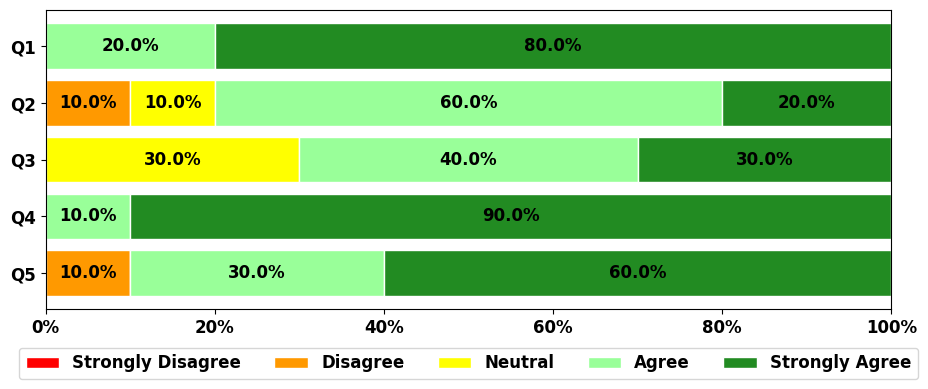

In [11]:

# Load the data from the Excel file
df = pd.read_excel('/home/asblab/aaron/s3/user_study.xlsx')

# Calculate the percentage of each response for each question
percentages = df.apply(lambda x: x.value_counts(normalize=True) * 100).fillna(0)

# Plotting
fig, ax = plt.subplots(figsize=(10, 4))

# Define the questions and colors for the segments
questions = ['Q5', 'Q4', 'Q3', 'Q2', 'Q1']  # Reversed order
colors = ['#ff0000', '#ff9900', '#ffff00', '#99ff99', '#228B22']  # Darker shades
# ... existing code ...

for i, question in enumerate(questions):
    bottom = 0
    for j in range(1, 6):
        value = percentages.loc[j, question]
        ax.barh(question, value, left=bottom, color=colors[j-1], edgecolor='white', label=f'Answer {j}' if i == 0 else "")
        if value > 0:  # Only label non-zero values
            ax.text(bottom + value / 2, i, f'{value:.1f}%', va='center', ha='center', color='black', fontsize=12, fontweight='bold')  # Increased font size to 12
        bottom += value

# Add labels and title
ax.set_xlim(0, 100)
ax.set_xticks(range(0, 101, 20))  # Set x-axis increments to 10%
ax.set_xticklabels([f'{i}%' for i in range(0, 101, 20)], fontweight='bold', fontsize=12)  # Label ticks as percentages, make them bold, and increase font size
ax.set_yticklabels(ax.get_yticklabels(), fontweight='bold', fontsize=12)  # Make y-axis tick labels bold and increase font size
# Adjusted legend position and made it bold
ax.legend(['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly Agree'], loc='upper center', bbox_to_anchor=(0.5, -0.10), ncol=5, prop={'weight': 'bold', 'size': 12})  # Increased legend font size

# Show the plot
plt.tight_layout()
plt.show()

In [12]:
fig.savefig('/home/asblab/aaron/s3/survey_results.png')